In [53]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree 
import matplotlib.pyplot as plt
import pydotplus

In [54]:
data = pd.read_csv('data/student-mat.csv', sep = ';')
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [95]:
def define_grade(df):
    #Create a list to store the data
    grades = []

    for row in df['G3']:
        if row >= (0.7 * df['G3'].max()):
            grades.append('Pass')
        elif row < (0.7 * df['G3'].max()):
            grades.append('Fail')   
    #Create a column from the list
    df['grades'] = grades
    return df

In [97]:
data = define_grade(data)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Fail
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,Fail
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,Pass
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,Fail
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,Fail


In [98]:
d = {'Fail': 0, 'Pass': 1}
data['grades'] = data['grades'].map(d)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,0


In [99]:
selected_columns = data[["G1", "G2", "sex", "Medu", "Fedu", "absences", "internet", "studytime", "failures", "activities", "Pstatus", "romantic", "paid", "famrel"]]
data2 = selected_columns.copy()
data2

,G1,G2,sex,Medu,Fedu,absences,internet,studytime,failures,activities,Pstatus,romantic,paid,famrel
0,5,6,F,4,4,6,no,2,0,no,A,no,no,4
1,5,5,F,1,1,4,yes,2,0,no,T,no,no,5
2,7,8,F,1,1,10,yes,2,3,no,T,no,yes,4
3,15,14,F,4,2,2,yes,3,0,yes,T,yes,yes,3
4,6,10,F,3,3,4,no,2,0,no,T,no,yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,9,9,M,2,2,11,no,2,2,no,A,no,yes,5
391,14,16,M,3,1,3,yes,1,0,no,T,no,no,2
392,10,8,M,1,1,3,no,1,3,no,T,no,no,5
393,11,12,M,3,2,0,yes,1,0,no,T,no,no,4


In [100]:
d = {'yes': 1, 'no': 0}
data2['activities'] = data2['activities'].map(d)
data2['internet'] = data2['internet'].map(d)
data2['romantic'] = data2['romantic'].map(d)
data2['paid'] = data2['paid'].map(d)

In [101]:
# map the sex data
d = {'F': 1, 'M': 0}
data2['sex'] = data2['sex'].map(d)

# map the parent's status
d = {'T': 1, 'A': 0}
data2['Pstatus'] = data2['Pstatus'].map(d)

In [102]:
data2

,G1,G2,sex,Medu,Fedu,absences,internet,studytime,failures,activities,Pstatus,romantic,paid,famrel
0,5,6,1,4,4,6,0,2,0,0,0,0,0,4
1,5,5,1,1,1,4,1,2,0,0,1,0,0,5
2,7,8,1,1,1,10,1,2,3,0,1,0,1,4
3,15,14,1,4,2,2,1,3,0,1,1,1,1,3
4,6,10,1,3,3,4,0,2,0,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,9,9,0,2,2,11,0,2,2,0,0,0,1,5
391,14,16,0,3,1,3,1,1,0,0,1,0,0,2
392,10,8,0,1,1,3,0,1,3,0,1,0,0,5
393,11,12,0,3,2,0,1,1,0,0,1,0,0,4


In [103]:
data_binary = pd.get_dummies(data2, columns=["sex", "internet", "activities", "Pstatus", "romantic", "paid"])
pd.set_option('max_columns', None)
data_binary.head()

,G1,G2,Medu,Fedu,absences,studytime,failures,famrel,sex_0,sex_1,internet_0,internet_1,activities_0,activities_1,Pstatus_0,Pstatus_1,romantic_0,romantic_1,paid_0,paid_1
0,5,6,4,4,6,2,0,4,0,1,1,0,1,0,1,0,1,0,1,0
1,5,5,1,1,4,2,0,5,0,1,0,1,1,0,0,1,1,0,1,0
2,7,8,1,1,10,2,3,4,0,1,0,1,1,0,0,1,1,0,0,1
3,15,14,4,2,2,3,0,3,0,1,0,1,0,1,0,1,0,1,0,1
4,6,10,3,3,4,2,0,4,0,1,1,0,1,0,0,1,1,0,0,1


In [104]:
student_features = data_binary.columns.tolist()
student_features

['G1',
 'G2',
 'Medu',
 'Fedu',
 'absences',
 'studytime',
 'failures',
 'famrel',
 'sex_0',
 'sex_1',
 'internet_0',
 'internet_1',
 'activities_0',
 'activities_1',
 'Pstatus_0',
 'Pstatus_1',
 'romantic_0',
 'romantic_1',
 'paid_0',
 'paid_1']

In [105]:
X = data_binary[student_features].copy()
X.columns

Index(['G1', 'G2', 'Medu', 'Fedu', 'absences', 'studytime', 'failures',
       'famrel', 'sex_0', 'sex_1', 'internet_0', 'internet_1', 'activities_0',
       'activities_1', 'Pstatus_0', 'Pstatus_1', 'romantic_0', 'romantic_1',
       'paid_0', 'paid_1'],
      dtype='object')

In [107]:
y=data[['grades']].copy()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [109]:
grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=8)
grade_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=8)

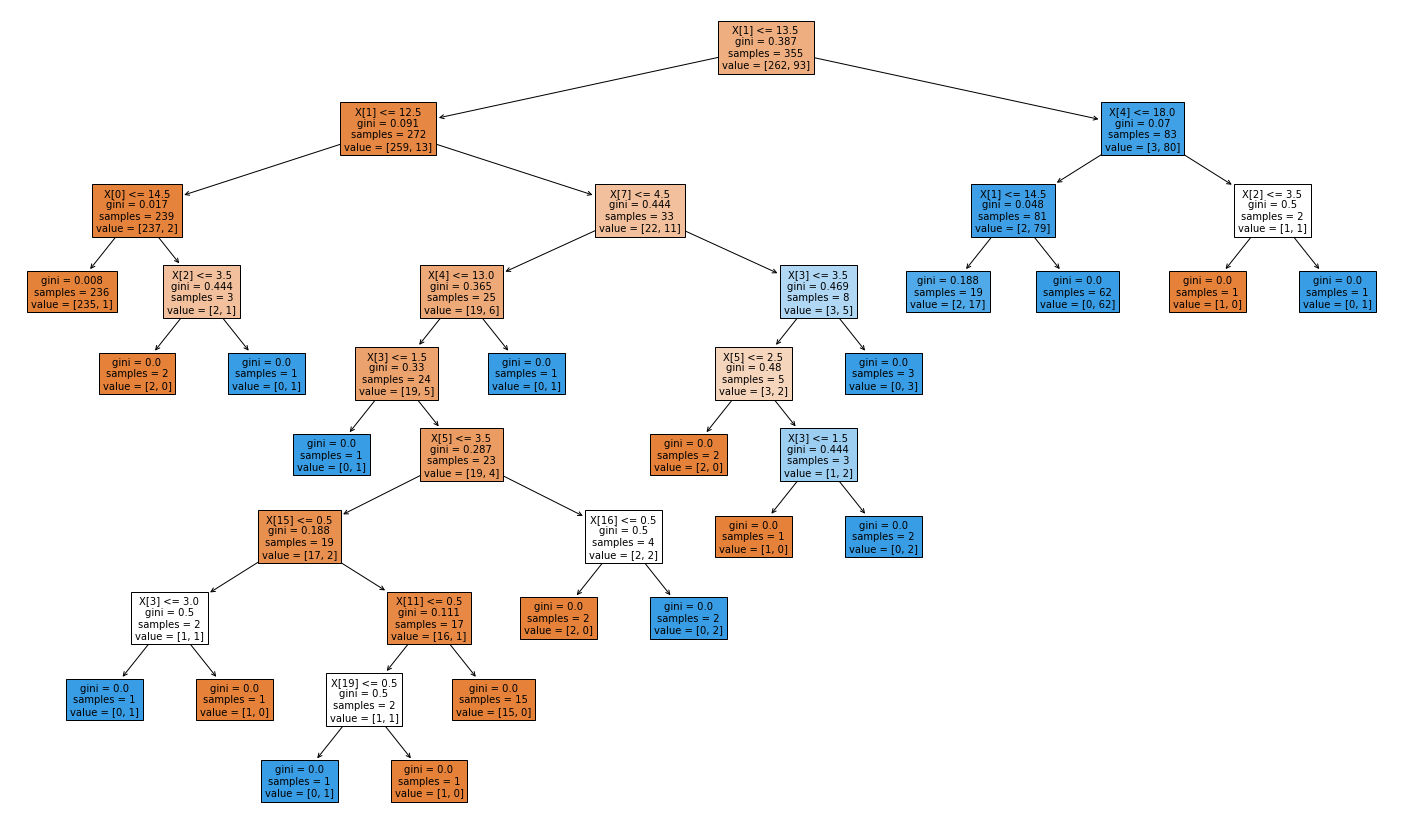

In [113]:
plt.figure(figsize=(25,15))  # set plot size (denoted in inches)
tree.plot_tree(grade_classifier, fontsize=10, filled=True)
plt.show()

In [111]:
predictions = grade_classifier.predict(X_test)

In [112]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.925